In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
data= pd.read_csv("energy_prod.csv", sep= ";")

In [3]:
data.shape

(9568, 5)

In [4]:
data.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [5]:
data.isna().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
data.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [8]:
data.columns = data.columns.str.strip()

In [9]:
data.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [10]:
data.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [11]:
data.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [12]:
data[data.duplicated(keep=False)]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
11,26.12,75.60,1017.41,72.31,439.68
45,28.41,75.60,1018.48,56.07,440.28
214,11.82,41.17,1019.50,55.74,475.61
708,11.61,41.17,1019.57,58.82,476.81
946,24.79,75.60,1017.07,68.23,440.05
...,...,...,...,...,...
9163,6.03,41.17,1019.81,84.20,488.57
9272,12.00,41.17,1019.48,58.71,474.40
9482,12.27,41.17,1019.39,52.18,473.84
9521,27.64,75.60,1017.35,54.78,441.04


In [13]:
data[data.duplicated(keep="last")]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
11,26.12,75.60,1017.41,72.31,439.68
45,28.41,75.60,1018.48,56.07,440.28
214,11.82,41.17,1019.50,55.74,475.61
708,11.61,41.17,1019.57,58.82,476.81
946,24.79,75.60,1017.07,68.23,440.05
1100,24.63,59.57,1010.45,85.36,440.67
1140,7.64,41.17,1020.01,75.14,488.53
1308,25.42,75.60,1017.39,77.63,438.24
1350,12.19,41.17,1019.43,65.47,475.64
1367,27.54,75.60,1018.26,57.89,440.87


In [14]:
data[data.duplicated()].shape

(41, 5)

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.tail()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57
9567,17.75,49.25,1020.86,63.67,454.41


In [17]:
data.reset_index(drop=True,inplace=True)

In [18]:
data.tail()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9522,17.10,49.69,1005.53,81.82,457.32
9523,24.73,65.34,1015.42,52.80,446.92
9524,30.44,56.24,1005.19,56.24,429.34
9525,23.00,66.05,1020.61,80.29,421.57
9526,17.75,49.25,1020.86,63.67,454.41


# VISUALIZATION

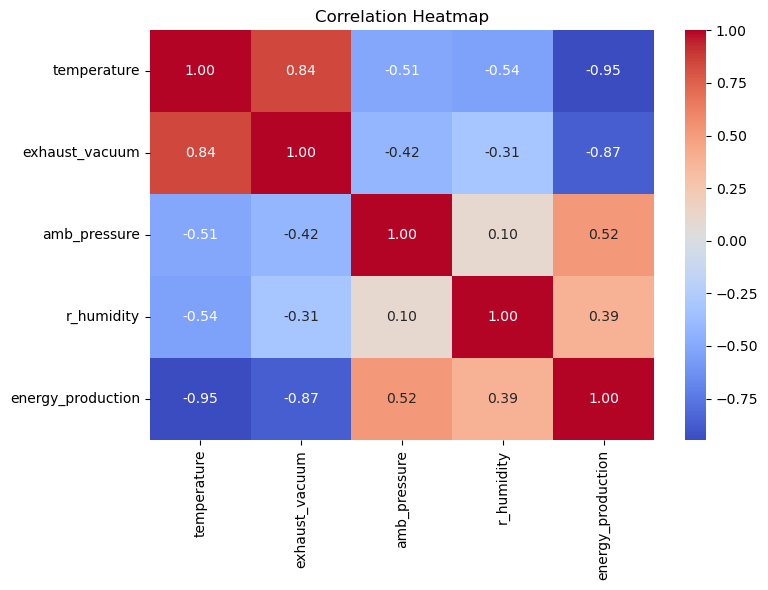

In [19]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


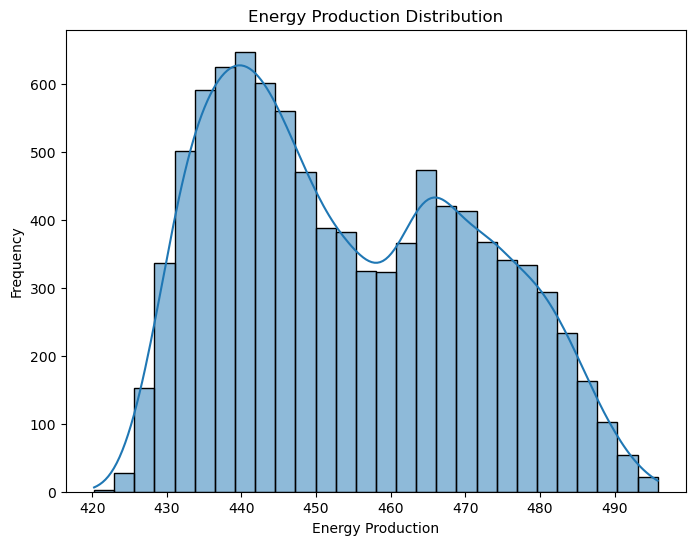

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data['energy_production'], kde=True)
plt.title('Energy Production Distribution')
plt.xlabel('Energy Production')
plt.ylabel('Frequency')
plt.show()

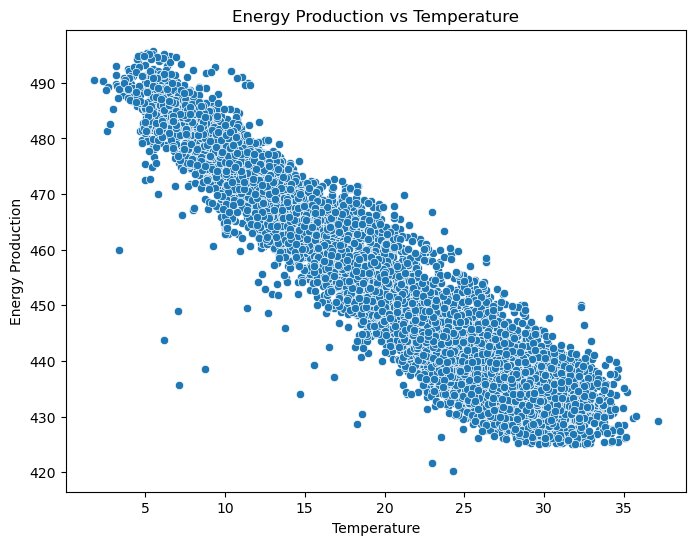

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='energy_production', data=data)
plt.title('Energy Production vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Energy Production')
plt.show()

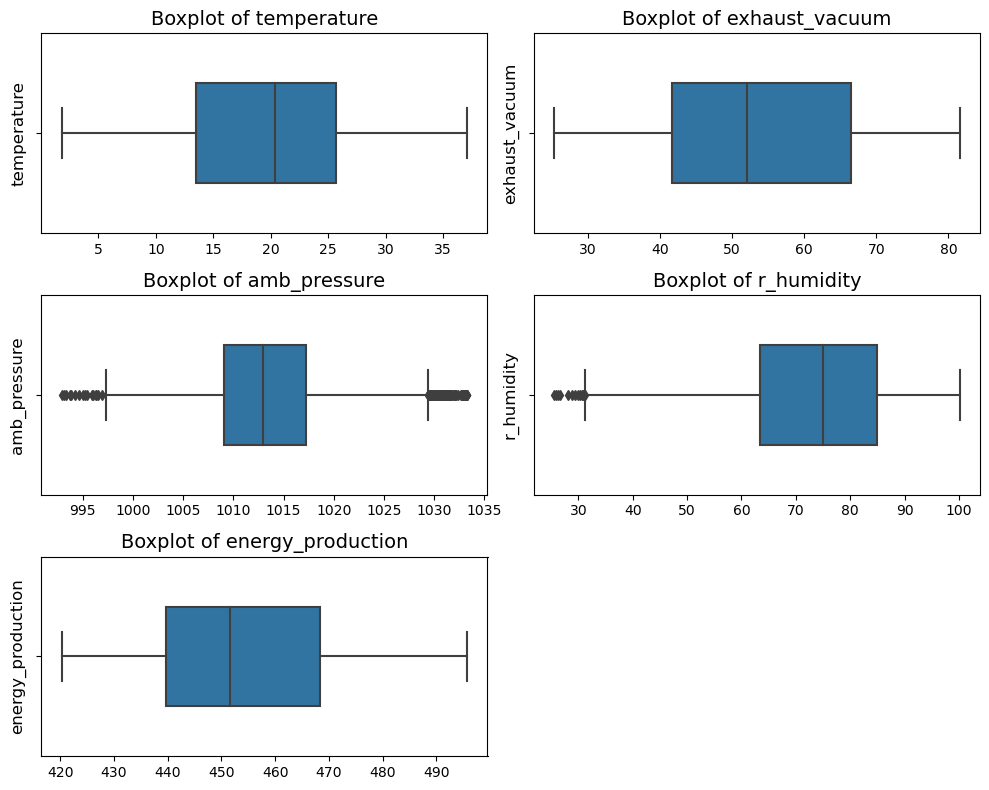

In [22]:
plt.figure(figsize=(10, 8))

# Plot boxplots for each numerical variable
for i, column in enumerate(data.columns):
    plt.subplot(3, 2, i+1)  # Adjust subplot layout as per your number of columns
    sns.boxplot(x=data[column], width=0.5)
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel('')  # Clear the x-label for better presentation
    plt.ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()

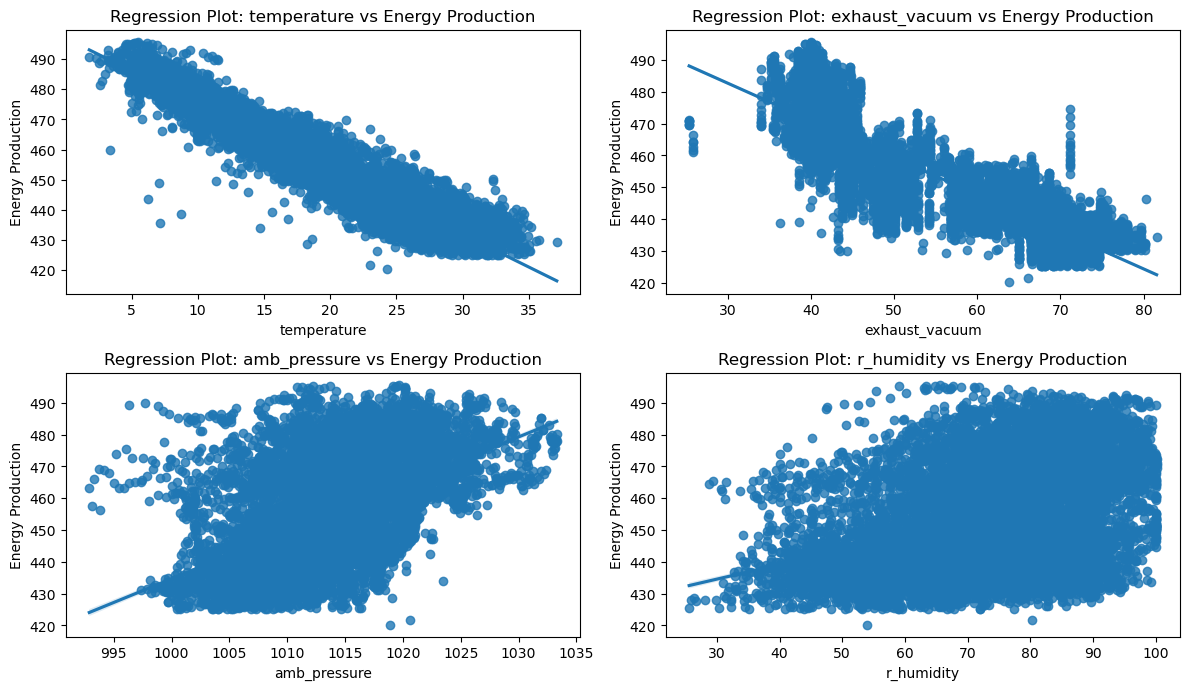

In [23]:
plt.figure(figsize=(12, 10))

for i, column in enumerate(data.columns[:-1]):  # Exclude the target variable (energy_production)
    plt.subplot(3, 2, i + 1)
    sns.regplot(x=column, y='energy_production', data=data)
    plt.title(f'Regression Plot: {column} vs Energy Production')
    plt.xlabel(column)
    plt.ylabel('Energy Production')

plt.tight_layout()
plt.show()

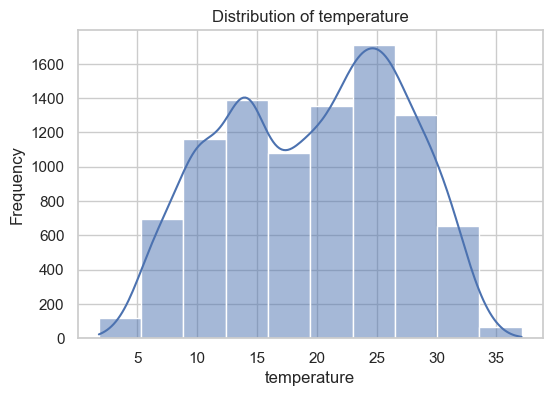

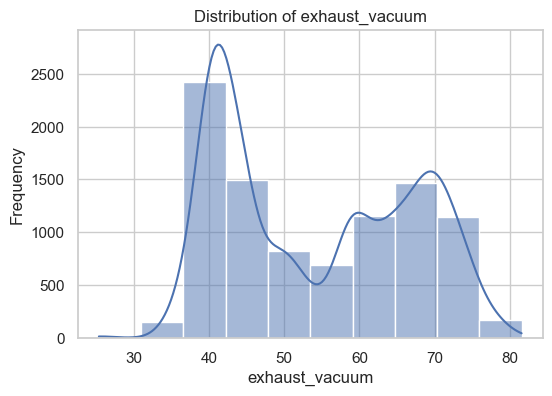

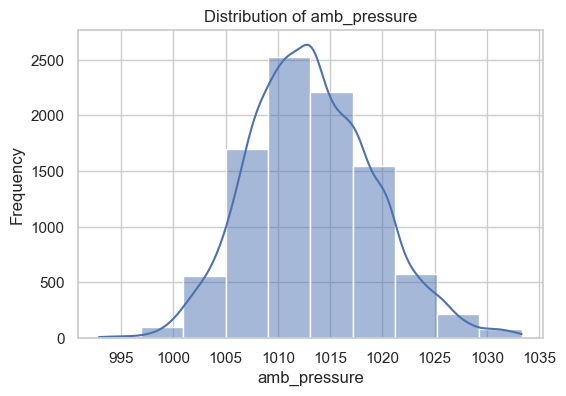

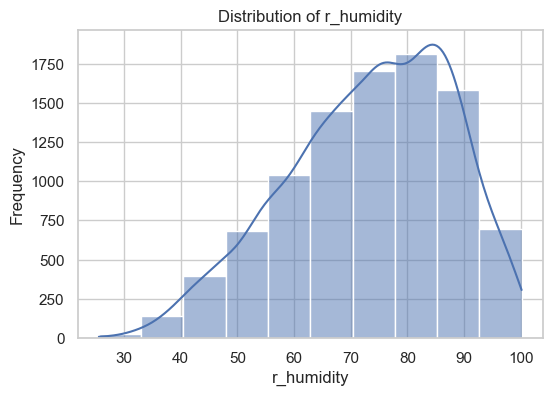

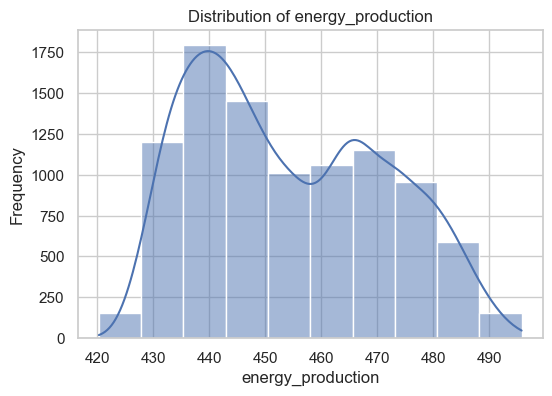

In [24]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create histograms for each attribute
attributes = data.columns  # Exclude the "class" column
for attribute in attributes:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[attribute], bins=10, kde=True)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.show()

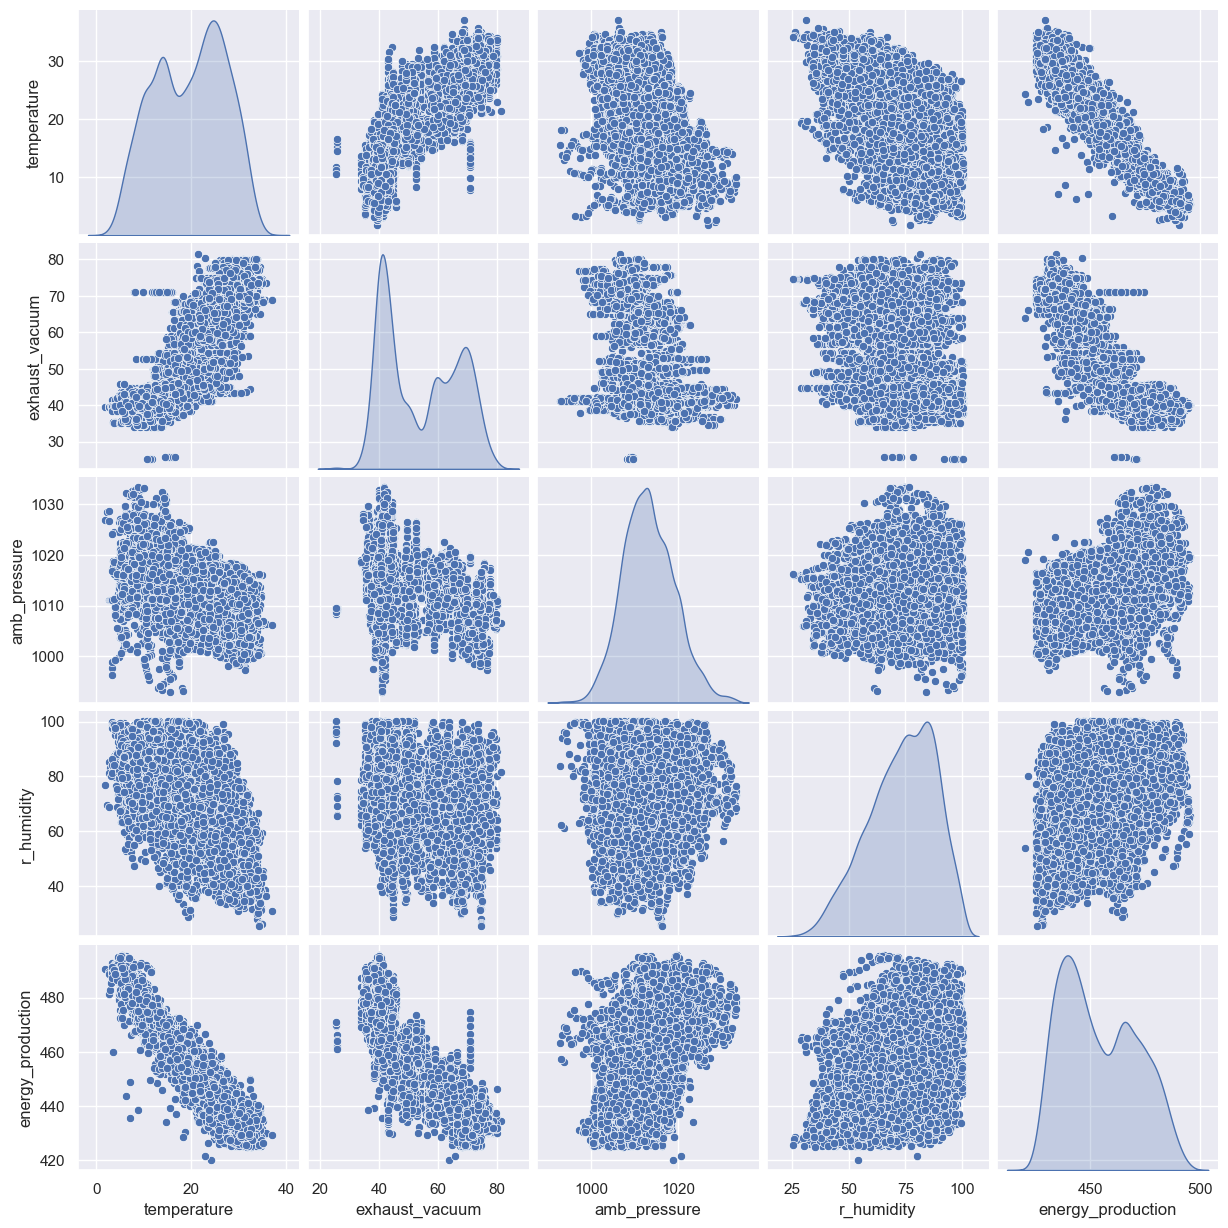

In [25]:
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')
sns.pairplot(data,diag_kind="kde")
plt.show()

# MODELING AND EVALUATION

# Linear Regression

In [26]:
from  sklearn.model_selection import train_test_split,GridSearchCV


In [27]:
# Assuming 'data' is your loaded dataset
X = data.drop('energy_production', axis=1)  # Features
y = data['energy_production']  # Target variable

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
param_grid = {'alpha': [0.1, 1, 10, 100]}

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge()

In [33]:
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [34]:
y_pred = best_model.predict(X_test_scaled)


In [35]:
y_pred = best_model.predict(X_test_scaled)


In [36]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error (MSE) using best model: {mse}")
print(f"R-squared Score using best model: {r2}")

Best Parameters: {'alpha': 0.1}
Mean Squared Error (MSE) using best model: 20.53271382133547
R-squared Score using best model: 0.9297263351214479


# Support Vector Machine (SVM) Regression

In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [38]:
# Define the parameter grid for SVR
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale'],
    'kernel': ['linear', 'rbf']
}

In [39]:
svm = SVR()

In [40]:
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='neg_mean_squared_error')
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [41]:
best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_

In [42]:
y_pred_svm = best_model_svm.predict(X_test_scaled)


In [43]:
# Calculate MSE and R-squared using the best SVR model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"Best Parameters for SVR: {best_params_svm}")
print(f"Mean Squared Error (MSE) using best SVR model: {mse_svm}")
print(f"R-squared Score using best SVR model: {r2_svm}")

Best Parameters for SVR: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Mean Squared Error (MSE) using best SVR model: 15.046092969444617
R-squared Score using best SVR model: 0.948504415720848


# Decision TRee Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

In [46]:
# Fit the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)


In [47]:
# Calculate MSE and R-squared for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error (MSE) using Decision Tree: {mse_dt}")
print(f"R-squared Score using Decision Tree: {r2_dt}")

Mean Squared Error (MSE) using Decision Tree: 20.17069702693249
R-squared Score using Decision Tree: 0.9309653455665186


# Multi-layer Perceptron (MLP) Regressor:

In [48]:
from sklearn.neural_network import MLPRegressor

In [49]:
# Initialize the MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

In [50]:
# Fit the MLP model to the training data
mlp.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42)

In [51]:
# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

In [52]:
# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) using MLP: {mse}")
print(f"R-squared Score using MLP: {r2}")

Mean Squared Error (MSE) using MLP: 18.43791058084754
R-squared Score using MLP: 0.936895845308435


# KNN Regressor

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
# Initialize KNN Regressor
knn = KNeighborsRegressor()

In [55]:
# Fit the model
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [56]:
# Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

In [57]:
# Calculate MSE and R-squared for KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [58]:
print(f"Mean Squared Error (MSE) using KNN: {mse_knn}")
print(f"R-squared Score using KNN: {r2_knn}")

Mean Squared Error (MSE) using KNN: 15.023882006295912
R-squared Score using KNN: 0.9485804332309795


# Gradient Boosting Regressor


In [59]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for GradientBoostingRegressor
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

In [60]:
# Initialize the GradientBoostingRegressor model
gbr = GradientBoostingRegressor(random_state=42)

In [61]:
grid_search_gb = GridSearchCV(gbr, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [62]:
from sklearn.model_selection import RandomizedSearchCV
random_search_gb = RandomizedSearchCV(gbr, param_distributions=param_grid_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [63]:
# Get the best parameters and the best model for GradientBoostingRegressor
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

In [64]:
# Make predictions on the test set using the best GradientBoostingRegressor model
y_pred_gb = best_model_gb.predict(X_test)

In [65]:
# Calculate MSE and R-squared using the best GradientBoostingRegressor model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [66]:
print(f"Best Parameters for GradientBoostingRegressor: {best_params_gb}")
print(f"Mean Squared Error (MSE) using best GradientBoostingRegressor model: {mse_gb}")
print(f"R-squared Score using best GradientBoostingRegressor model: {r2_gb}")

Best Parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Mean Squared Error (MSE) using best GradientBoostingRegressor model: 10.32734497203836
R-squared Score using best GradientBoostingRegressor model: 0.9646544345786328


# Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor


In [68]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
y_pred = model.predict(X_test)

In [70]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Model")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Random Forest Model
Mean Squared Error: 11.115111440139945
R-squared: 0.9619582865066518


In [71]:
from sklearn.linear_model import Lasso

In [72]:
model = Lasso()
model.fit(X_train, y_train)

Lasso()

In [73]:
y_pred = model.predict(X_test)

In [74]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Model")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Lasso Regression Model
Mean Squared Error: 20.664570104500328
R-squared: 0.9292750540908016


# XGBOOST

In [75]:
import xgboost as xgb

In [76]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [77]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1
}


In [78]:
# Training the XGBoost model
num_round = 100
model = xgb.train(params, dtrain, num_round)


In [79]:

# Making predictions
y_pred = model.predict(dtest)


In [80]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [81]:
print("XGBoost Regression Model")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

XGBoost Regression Model
Mean Squared Error: 15.140100529658024
R-squared: 0.948182672777369


# Bagging Regression

In [82]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


In [83]:
# Initializing and fitting a Bagging regression model using DecisionTreeRegressor as base estimator
base_model = DecisionTreeRegressor()
model = BaggingRegressor(base_estimator=base_model)
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor())

In [84]:
# Making predictions
y_pred = model.predict(X_test)


In [85]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [86]:
print("Bagging Regression Model")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Bagging Regression Model
Mean Squared Error: 11.991023906960473
R-squared: 0.958960456814391


# AdaBoost Regression


In [87]:
from sklearn.ensemble import AdaBoostRegressor


In [88]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)


AdaBoostRegressor()

In [89]:
y_pred = model.predict(X_test)

In [90]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("AdaBoost Regression Model")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

AdaBoost Regression Model
Mean Squared Error: 33.71441492466316
R-squared: 0.884611673030266


# Bayesian Ridge Regression


In [91]:
from sklearn.linear_model import BayesianRidge


In [92]:
# Initializing and fitting a Bayesian Ridge regression model
model = BayesianRidge()
model.fit(X_train, y_train)


BayesianRidge()

In [93]:
y_pred = model.predict(X_test)


In [94]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Bayesian Ridge Regression Model")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Bayesian Ridge Regression Model
Mean Squared Error: 20.53295123128722
R-squared: 0.9297255225806638


# LassoLars

In [95]:
from sklearn.linear_model import LassoLars
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your data is stored in a DataFrame 'df'

# Separating features and target variable
X = data.drop(columns=['energy_production'])
y = data['energy_production']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting a LARS Lasso regression model
model = LassoLars(alpha=0.1)  # You can adjust the regularization parameter alpha
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("LARS Lasso Regression Model")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


LARS Lasso Regression Model
Mean Squared Error: 20.882499957614723
R-squared: 0.9282878593446923


# HuberRegressor

In [96]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your data is stored in a DataFrame 'df'

# Separating features and target variable
X = data.drop(columns=['energy_production'])
y = data['energy_production']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting a Huber Regressor model
model = HuberRegressor(epsilon=1.35)  # You can adjust the epsilon parameter
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Huber Regressor Model")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Huber Regressor Model
Mean Squared Error: 25.306129928832636
R-squared: 0.9130967675047836


# PassiveAggressiveRegressor

In [97]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your data is stored in a DataFrame 'df'

# Separating features and target variable
X = data.drop(columns=['energy_production'])
y = data['energy_production']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting a Passive Aggressive Regressor model
model = PassiveAggressiveRegressor(C=1.0, max_iter=1000)  # You can adjust parameters like C and max_iter
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Passive Aggressive Regressor Model")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Passive Aggressive Regressor Model
Mean Squared Error: 40.88118293238316
R-squared: 0.8596108154410218


As we have done Model Evaluation we have Finalized Gradient Boosting Regressor as our finalized Model with R-Squared of 96%, next we are going to save model


In [99]:
import joblib

In [100]:
joblib.dump(best_model_gb, 'EGGBR.pkl')

['EGGBR.pkl']